# Ice-Albedo Feedback Model 

This has been written as a Jupyter Notebook to illustrate the outputs better. To run the code yourself, please run the below cell in notebook or as a separate Python script. To see the precomputed outputs and plots, please scroll to the subsequent cell.

### Python Script

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt

def FeedbackModel(initial_albedo, n_iterations):
    
    # =================================
    # set model parameters and plotting
    # =================================

    # default parameters
    albedo_m = -0.01
    albedo_c = 2.8
    latitude_m = 1.5
    latitude_c = -322.5
    sigma = 5.67E-8
    L_min = 1150
    L_max = 1350
    
    # initialise lists
    solar_constant = []
    mean_temperature = []
    planetary_albedo = []
    ice_latitude = []
    
    # plot settings
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    ax[0].set_title('Temperature (K) with Decreasing Solar Constant')
    ax[1].set_title('Temperature (K) with Increasing Solar Constant')
    plasma = cm.get_cmap('plasma', ((L_max-L_min)+1))
    c_map = cm.ScalarMappable(cmap=cm.plasma)
    
    # ===================================
    # model for decreasing solar constant
    # ===================================
    
    # initialise empty arrays for plotting
    iterations = np.zeros(n_iterations)
    temperatures = np.zeros(n_iterations)
    
    # start from initial albedo and maximum L
    albedo = initial_albedo
    L = L_max
    
    # calculate temperature, albedo, latitude
    while L > (L_min-1):
        for i in np.arange(0, n_iterations):
            T = (L*(1-albedo)/(4*sigma))**(0.25)
            albedo = albedo_m*T + albedo_c
            if albedo < 0.15:
                albedo = 0.15
            elif albedo > 0.65:
                albedo = 0.65
            latitude = latitude_m* T + latitude_c
            if latitude < 0:
                latitude = 0
            elif latitude > 90:
                latitude = 90
            iterations[i] = i + 1
            temperatures[i] = T
        ax[0].plot(iterations, temperatures, color=plasma(L-L_min))  
        ax[0].set_xlabel('Iteration')
        ax[0].set_ylabel('Temperature (K)')
        solar_constant.append(L)
        mean_temperature.append(T)
        planetary_albedo.append(albedo)
        ice_latitude.append(latitude)
        L = L - 10    
        
    # legend to show solar constant
    c_bar_decreasing = plt.colorbar(
        mappable=c_map, 
        ax=ax[0]
    )
    c_bar_decreasing.set_ticks([0, 1])
    c_bar_decreasing.set_ticklabels([str(L_min), str(L_max)])
    c_bar_decreasing.set_label(
        'Solar Constant (W/m$^2$)',
        labelpad=-10,
        rotation=270
    )
    
    # ===================================
    # model for increasing solar constant
    # ===================================
    
    # initialise empty arrays for plotting
    iterations = np.zeros(n_iterations)
    temperatures = np.zeros(n_iterations)
    
    # start from initial albedo and minimum L
    albedo = initial_albedo
    L = L_min
    
    # calculate temperature, albedo, latitude
    while L < (L_max+1):
        for i in np.arange(0, n_iterations):
            T = (L*(1-albedo)/(4*sigma))**(0.25)
            albedo = albedo_m*T + albedo_c
            if albedo < 0.15:
                albedo = 0.15
            elif albedo > 0.65:
                albedo = 0.65
            latitude = latitude_m* T + latitude_c
            if latitude < 0:
                latitude = 0
            elif latitude > 90:
                latitude = 90
            iterations[i] = i + 1
            temperatures[i] = T
        ax[1].plot(iterations, temperatures, color=plasma(L-L_min))      
        ax[1].set_xlabel('Iteration')
        ax[1].set_ylabel('Temperature (K)')
        solar_constant.append(L)
        mean_temperature.append(T)
        planetary_albedo.append(albedo)
        ice_latitude.append(latitude)
        L = L + 10
        
    # legend to show solar constant
    c_bar_increasing = plt.colorbar(
        mappable=c_map, 
        ax=ax[1]
    )
    c_bar_increasing.set_ticks([0, 1])
    c_bar_increasing.set_ticklabels([str(L_min), str(L_max)])
    c_bar_increasing.set_label(
        'Solar Constant (W/m$^2$)',
        labelpad=-10,
        rotation=270
    )
    
    # =====================
    # dataframe of results
    # =====================
    
    results = pd.DataFrame(
        data={
            'Solar Constant': solar_constant, 
            'Mean Temperature': mean_temperature, 
            'Planetary Albedo': planetary_albedo, 
            'Ice Latitude': ice_latitude
        }
    )
    
    return results

model = FeedbackModel(0.15, 100)

### Jupyter Notebook

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [2]:
def FeedbackModel(initial_albedo, n_iterations):
    
    # =================================
    # set model parameters and plotting
    # =================================

    # default parameters
    albedo_m = -0.01
    albedo_c = 2.8
    latitude_m = 1.5
    latitude_c = -322.5
    sigma = 5.67E-8
    L_min = 1150
    L_max = 1350
    
    # initialise lists
    solar_constant = []
    mean_temperature = []
    planetary_albedo = []
    ice_latitude = []
    
    # plot settings
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    ax[0].set_title('Temperature (K) with Decreasing Solar Constant')
    ax[1].set_title('Temperature (K) with Increasing Solar Constant')
    plasma = cm.get_cmap('plasma', ((L_max-L_min)+1))
    c_map = cm.ScalarMappable(cmap=cm.plasma)
    
    # ===================================
    # model for decreasing solar constant
    # ===================================
    
    # initialise empty arrays for plotting
    iterations = np.zeros(n_iterations)
    temperatures = np.zeros(n_iterations)
    
    # start from initial albedo and maximum L
    albedo = initial_albedo
    L = L_max
    
    # calculate temperature, albedo, latitude
    while L > (L_min-1):
        for i in np.arange(0, n_iterations):
            T = (L*(1-albedo)/(4*sigma))**(0.25)
            albedo = albedo_m*T + albedo_c
            if albedo < 0.15:
                albedo = 0.15
            elif albedo > 0.65:
                albedo = 0.65
            latitude = latitude_m* T + latitude_c
            if latitude < 0:
                latitude = 0
            elif latitude > 90:
                latitude = 90
            iterations[i] = i + 1
            temperatures[i] = T
        ax[0].plot(iterations, temperatures, color=plasma(L-L_min))  
        ax[0].set_xlabel('Iteration')
        ax[0].set_ylabel('Temperature (K)')
        solar_constant.append(L)
        mean_temperature.append(T)
        planetary_albedo.append(albedo)
        ice_latitude.append(latitude)
        L = L - 10    
        
    # legend to show solar constant
    c_bar_decreasing = plt.colorbar(
        mappable=c_map, 
        ax=ax[0]
    )
    c_bar_decreasing.set_ticks([0, 1])
    c_bar_decreasing.set_ticklabels([str(L_min), str(L_max)])
    c_bar_decreasing.set_label(
        'Solar Constant (W/m$^2$)',
        labelpad=-10,
        rotation=270
    )
    
    # ===================================
    # model for increasing solar constant
    # ===================================
    
    # initialise empty arrays for plotting
    iterations = np.zeros(n_iterations)
    temperatures = np.zeros(n_iterations)
    
    # start from initial albedo and minimum L
    albedo = initial_albedo
    L = L_min
    
    # calculate temperature, albedo, latitude
    while L < (L_max+1):
        for i in np.arange(0, n_iterations):
            T = (L*(1-albedo)/(4*sigma))**(0.25)
            albedo = albedo_m*T + albedo_c
            if albedo < 0.15:
                albedo = 0.15
            elif albedo > 0.65:
                albedo = 0.65
            latitude = latitude_m* T + latitude_c
            if latitude < 0:
                latitude = 0
            elif latitude > 90:
                latitude = 90
            iterations[i] = i + 1
            temperatures[i] = T
        ax[1].plot(iterations, temperatures, color=plasma(L-L_min))      
        ax[1].set_xlabel('Iteration')
        ax[1].set_ylabel('Temperature (K)')
        solar_constant.append(L)
        mean_temperature.append(T)
        planetary_albedo.append(albedo)
        ice_latitude.append(latitude)
        L = L + 10
        
    # legend to show solar constant
    c_bar_increasing = plt.colorbar(
        mappable=c_map, 
        ax=ax[1]
    )
    c_bar_increasing.set_ticks([0, 1])
    c_bar_increasing.set_ticklabels([str(L_min), str(L_max)])
    c_bar_increasing.set_label(
        'Solar Constant (W/m$^2$)',
        labelpad=-10,
        rotation=270
    )
    
    # =====================
    # dataframe of results
    # =====================
    
    results = pd.DataFrame(
        data={
            'Solar Constant': solar_constant, 
            'Mean Temperature': mean_temperature, 
            'Planetary Albedo': planetary_albedo, 
            'Ice Latitude': ice_latitude
        }
    )
    
    return results

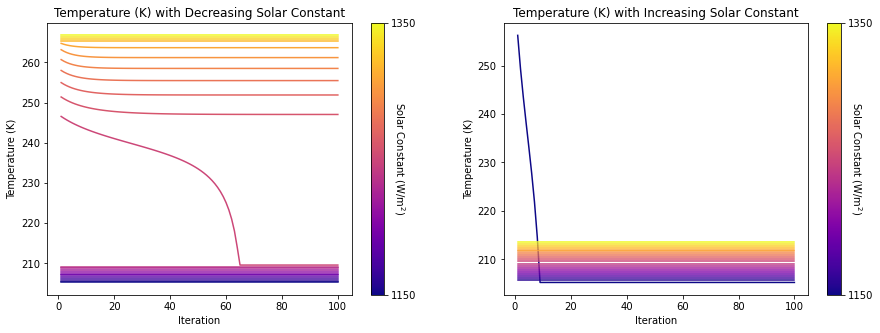

In [3]:
model = FeedbackModel(0.15, 100)

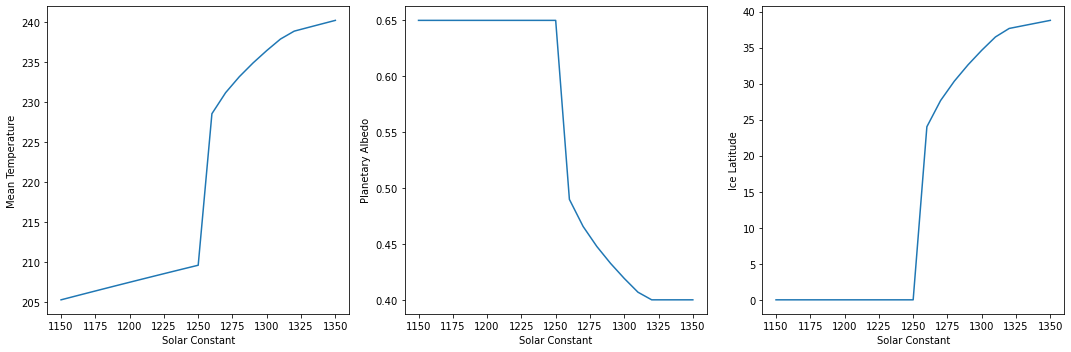

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
sns.lineplot(
    data=model, 
    x='Solar Constant',
    y='Mean Temperature', 
    ci=None, 
    ax=ax[0]
)
sns.lineplot(
    data=model, 
    x='Solar Constant',
    y='Planetary Albedo', 
    ci=None, 
    ax=ax[1]
)
sns.lineplot(
    data=model, 
    x='Solar Constant',
    y='Ice Latitude', 
    ci=None, 
    ax=ax[2]
)
plt.tight_layout()